# 币安行情k线图绘制


- https://www.kaggle.com/code/jkraak/crypto-prices-data-a-step-by-step-tutorial

In [1]:
#importing the necessary libraries for this project
import pandas as pd
import datetime
import requests

# If you haven't done so previously you will need to install mplfinance

#!pip install mplfinance 
import mplfinance as mpf

In [26]:
import time

symbol = 'BTCUSDT' #Choosing Bitcoin 

interval = '1d'  # Daily interval. Other allowed intervals include: ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']

# start_time = 1672531200000  # Timestamp for January 1, 2023, 00:00:00 UTC
# end_time = 1690848000000 # Timestamp for August 1, 2023, 00:00:00 UTC

def ToMs(date):
    return int(time.mktime(time.strptime(str(date), "%Y-%m-%d %H:%M:%S")) * 1000) # Binance timestamp format is 13 digits

start_time = ToMs('2024-12-01 12:00:00')
end_time = ToMs('2025-02-01 12:00:00')


limit= 1000   # By default the API call returns 500 records with 1000 as the limit

In [27]:
#API endpoint
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}&limit={limit}"

#GET Request
response = requests.get(url)

#JSON Conversion
data = response.json()

print(data)



[[1733097600000, '97185.17000000', '98130.00000000', '94395.00000000', '95840.62000000', '37958.66981000', 1733183999999, '3646639621.73758780', 7560103, '18821.93327000', '1808458555.89058410', '0'], [1733184000000, '95840.61000000', '96305.52000000', '93578.17000000', '95849.69000000', '35827.32283000', 1733270399999, '3413995542.01865610', 5361712, '17339.11167000', '1652090703.17559560', '0'], [1733270400000, '95849.69000000', '99000.00000000', '94587.83000000', '98587.32000000', '43850.53728000', 1733356799999, '4241994533.78610610', 6648724, '22033.60112000', '2132655972.04500000', '0'], [1733356800000, '98587.32000000', '104088.00000000', '90500.00000000', '96945.63000000', '109921.72966200', 1733443199999, '11048002942.14993118', 12012364, '56235.07835600', '5657171374.76345580', '0'], [1733443200000, '96945.63000000', '101898.99000000', '95981.72000000', '99740.84000000', '45049.53310000', 1733529599999, '4456641685.36444370', 6919102, '21999.62416000', '2175645718.55336060', 

In [28]:
# counting the number of records
print(len(data))

62


In [29]:
#naming the columns
col_names = ["open_time", "Open","High","Low","Close","Volume", "close_time","quote_asset_volume","number_of_trades","taker_buy_asset_volume","taker_buy_quote_volume","ignored_data" ]

#creating a df
df = pd.DataFrame(data, columns=col_names)


#Exploring the df
df.head()



,open_time,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_volume,ignored_data
0,1733097600000,97185.17000000,98130.00000000,94395.00000000,95840.62000000,37958.66981000,1733183999999,3646639621.73758780,7560103,18821.93327000,1808458555.89058410,0
1,1733184000000,95840.61000000,96305.52000000,93578.17000000,95849.69000000,35827.32283000,1733270399999,3413995542.01865610,5361712,17339.11167000,1652090703.17559560,0
2,1733270400000,95849.69000000,99000.00000000,94587.83000000,98587.32000000,43850.53728000,1733356799999,4241994533.78610610,6648724,22033.60112000,2132655972.04500000,0
3,1733356800000,98587.32000000,104088.00000000,90500.00000000,96945.63000000,109921.72966200,1733443199999,11048002942.14993118,12012364,56235.07835600,5657171374.76345580,0
4,1733443200000,96945.63000000,101898.99000000,95981.72000000,99740.84000000,45049.53310000,1733529599999,4456641685.36444370,6919102,21999.62416000,2175645718.55336060,0


In [30]:
#Exploring the tail of the df
df.tail()

,open_time,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_volume,ignored_data
57,1738022400000,102082.83000000,103800.00000000,100272.68000000,101335.52000000,22022.05765000,1738108799999,2253977324.03620920,5428644,10756.64741000,1101357650.29198760,0
58,1738108800000,101335.52000000,104782.68000000,101328.01000000,103733.24000000,23155.35802000,1738195199999,2380383694.77213620,5189699,11675.17182000,1200636637.81436690,0
59,1738195200000,103733.25000000,106457.44000000,103278.54000000,104722.94000000,19374.07472000,1738281599999,2038112603.51264120,3990075,10140.92834000,1066933244.99202070,0
60,1738281600000,104722.94000000,106012.00000000,101560.00000000,102429.56000000,21983.18193000,1738367999999,2282174002.19521760,4331904,10697.39968000,1111485874.12928450,0
61,1738368000000,102429.56000000,102783.71000000,100279.51000000,100635.65000000,12290.95747000,1738454399999,1250354228.23722970,2588786,5625.89331000,572540016.14901110,0


In [31]:
# Inspecting the data types of the variables
df.dtypes

open_time                  int64
Open                      object
High                      object
Low                       object
Close                     object
Volume                    object
close_time                 int64
quote_asset_volume        object
number_of_trades           int64
taker_buy_asset_volume    object
taker_buy_quote_volume    object
ignored_data              object
dtype: object

In [32]:
import datetime 
# as we noticed before 'open_time' and 'close_time' are in epoch format. We need to convert them into datetime 

df['open_time'] = pd.to_datetime(df["open_time"], unit='ms')
df['close_time'] = pd.to_datetime(df["close_time"], unit='ms')

df[['open_time','close_time']].head()

,open_time,close_time
0,2024-12-02,2024-12-02 23:59:59.999
1,2024-12-03,2024-12-03 23:59:59.999
2,2024-12-04,2024-12-04 23:59:59.999
3,2024-12-05,2024-12-05 23:59:59.999
4,2024-12-06,2024-12-06 23:59:59.999


In [33]:
## changing dtypes of columns from obj to float
col_dtypes = ["Open","High","Low","Close","Volume","quote_asset_volume","taker_buy_asset_volume","taker_buy_quote_volume"]

#iterate over every column and convert to float
for val in col_dtypes:
    df[val] = df[val].astype(float)

In [34]:
# to plot using the mpl finance library, we need 'open_time' to be set as index
df = df.set_index('open_time')

In [21]:
#exploring the documentation of mpf.plot
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



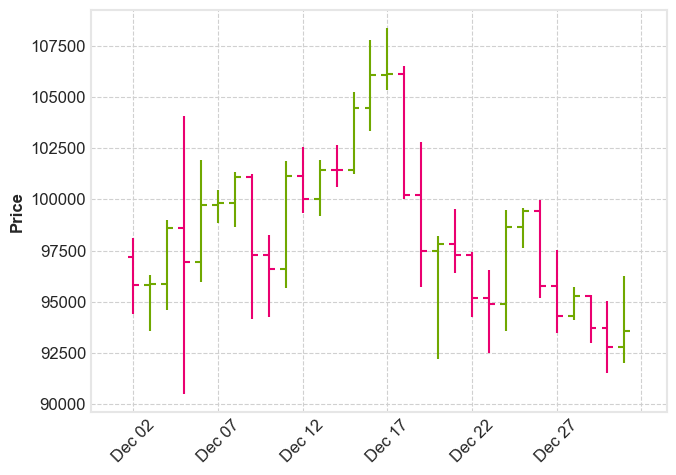

In [44]:
# Plotting the chart with default parameters
mpf.plot(df.iloc[:30], style = 'binance', )

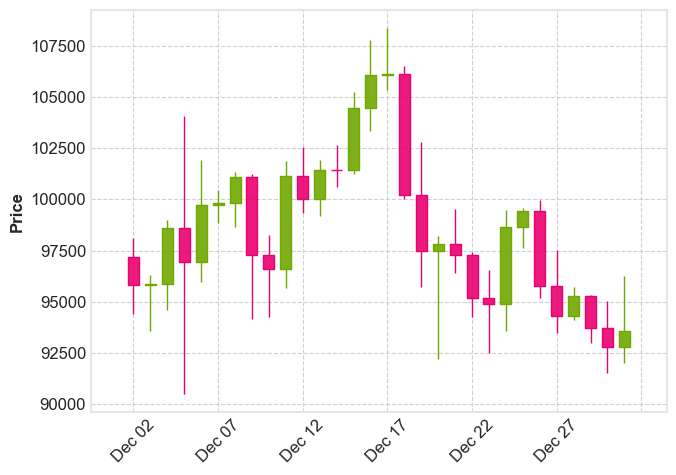

In [43]:
#candlestick chart of the first 30 records
mpf.plot(df.iloc[:30], type='candle', style = 'binance', )

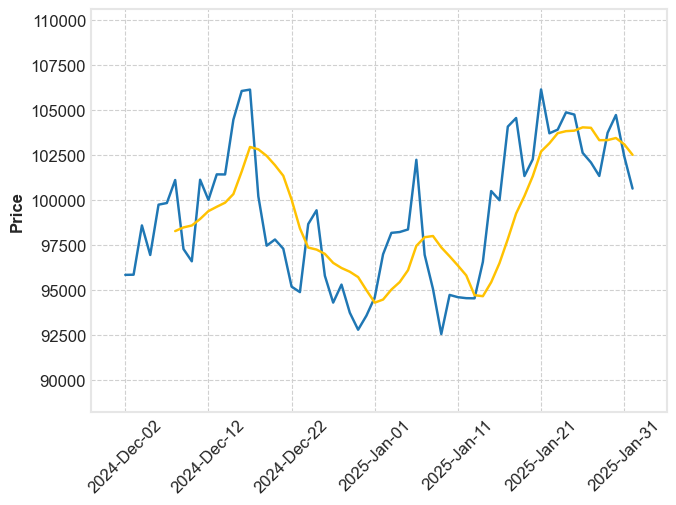

In [42]:
mpf.plot(df, type='line', style = 'binance', mav=7)

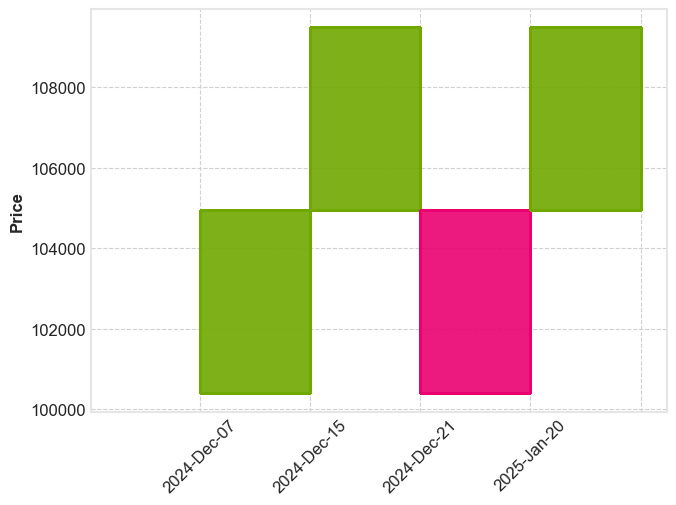

In [41]:
mpf.plot(df, type='renko', style = 'binance', )

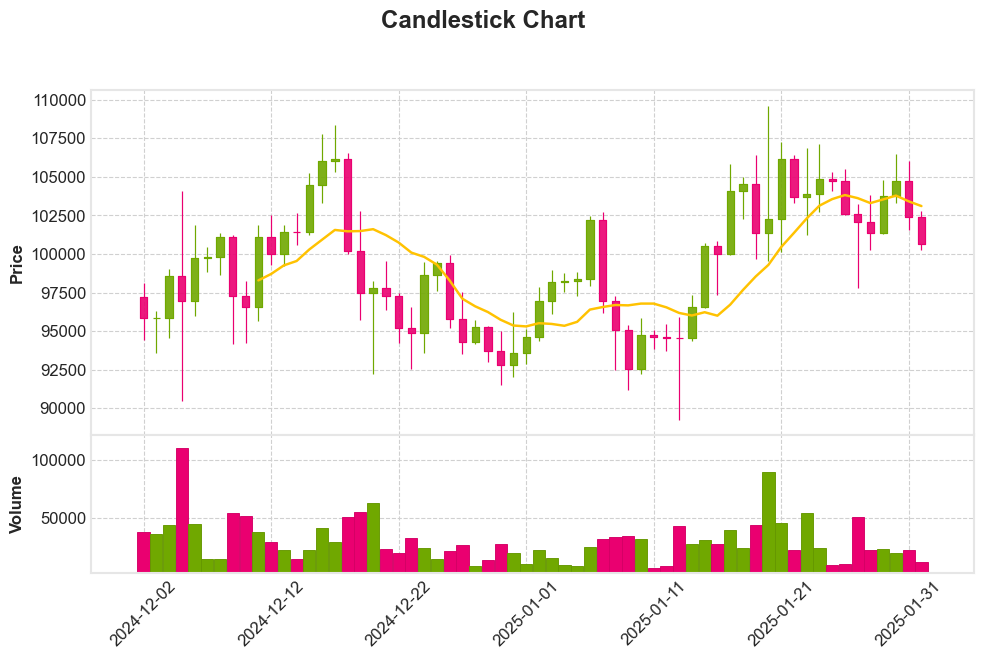

In [40]:
mpf.plot(df.iloc[:120], type='candle',
         style = 'binance', 
         title='Candlestick Chart',
         ylabel='Price',
         mav=10,
         volume=True,
         show_nontrading=False,
         datetime_format='%Y-%m-%d',
         figscale=1.2,
         figratio=(16, 9))